In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def f(x):
    return 3*x**2 - 4*x + 5

In [4]:
f(3.0)

20.0

In [6]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)

In [9]:
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [10]:
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

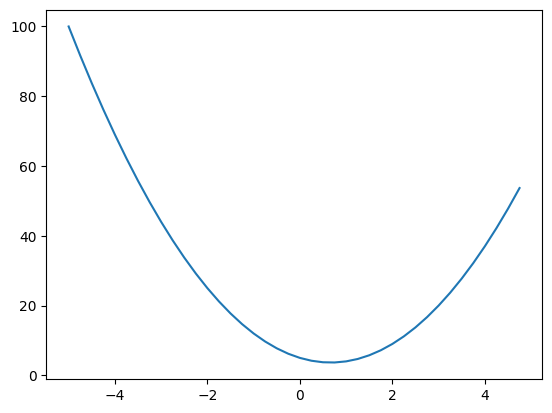

In [11]:
plt.plot(xs, ys)

In [12]:
h = 0.001
x = 3.0
f(x)

20.0

In [13]:
f(x + h)

20.014003000000002

In [14]:
f(x + h) - f(x)

0.01400300000000243

In [16]:
(f(x + h) - f(x))/h

14.00300000000243

In [19]:
h = 0.00000001
(f(x + h) - f(x))/h

14.00000009255109

In [22]:
h = 0.000001
x = 2/3
(f(x + h) - f(x))/h

2.999378523327323e-06

In [23]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [24]:
h = 0.0001

# imputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [25]:
h = 0.0001

# imputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
b += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 4.0002
slope 2.0000000000042206


In [51]:
h = 0.0001

# imputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


In [52]:
a = Value(2.0)
a

Value(data=2.0)

In [53]:
b = Value(-3.0)

In [54]:
a + b

Value(data=-1.0)

In [55]:
a * b

Value(data=-6.0)

In [56]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [57]:
d._op

'+'

In [58]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')

e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d*f; L.label = 'L'

In [61]:
L

Value(data=-8.0)

In [63]:
L = d * f
dL/dd = 

SyntaxError: cannot assign to operator (1121757582.py, line 2)

In [64]:
L.grad = 1.0

In [75]:
def lol():
    
    h = 0.001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
#     c.data += h
    e = a * b; e.label = 'e'
    e.data += h
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'  
    L2 = L.data  #+ h
    
    print((L2 - L1)/h)
    
lol()

-2.000000000000668


In [47]:
dL / dC

NameError: name 'dL' is not defined

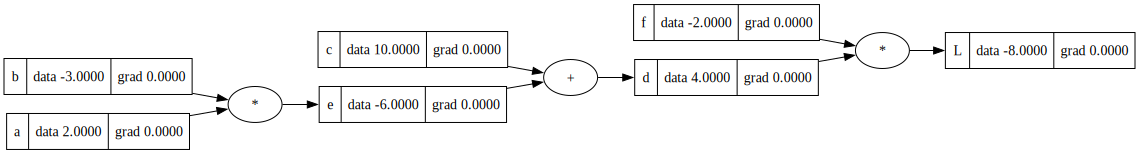

In [62]:
draw_root(L)

In [14]:
class Value:
    
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        
        return out
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        
        return out
    
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self,), f'**{other}')
        
        def _backward():
            self.grad += other * (self.data ** (other - 1)) * out.grad
        out._backward = _backward
        
        return out
    
    def __rmul__(self, other): # other * self
        return self*other
    
    def __truediv__(self, other): # self / other
        return self * other**-1
    
    def __neg__(self, other): # -self
        return self * -1
    
    def __sub__(self, other): # self - other
        return self + (-other)
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
        
        return out
    
    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')
        
        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward
        
        return out
        
    def backward(self):

        topo = []
        visited = set()
        def build_topological_ordering(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topological_ordering(child)
                topo.append(v)
        build_topological_ordering(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()
            
        return

In [3]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = Left to right
    
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name=uid, label = "{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect
            dot.edge(uid + n._op, uid)
        
    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
        
    return dot

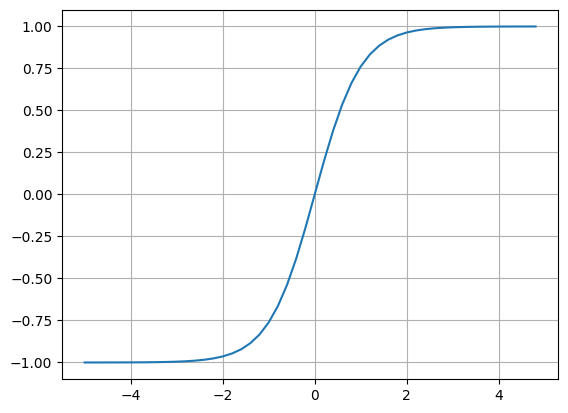

In [4]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

In [5]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')    
# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.881373587, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n';

o = n.tanh(); o.label = 'o';

o.backward()

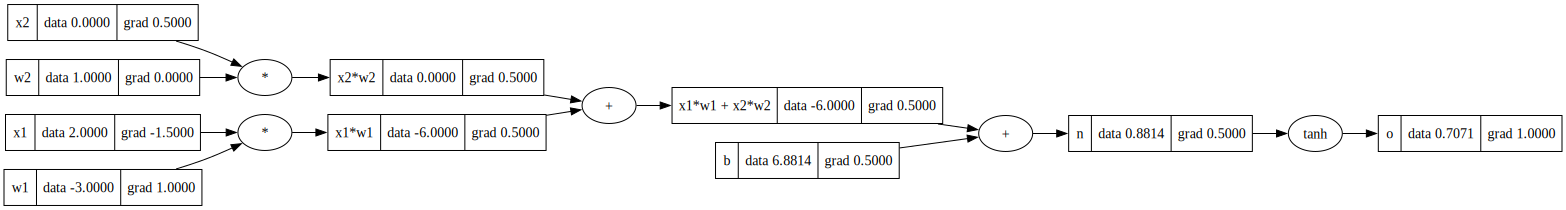

In [6]:
draw_dot(o)

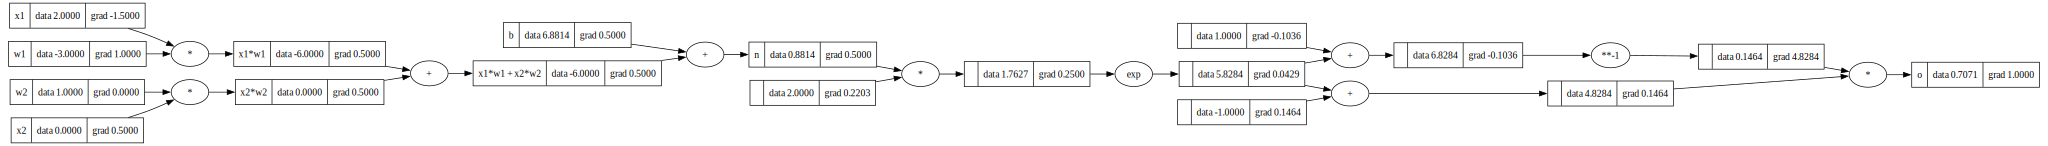

In [7]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')    
# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.881373587, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n';
# ----
e = (2*n).exp()
o = (e - 1) / (e + 1)
# ----
o.label = 'o'
o.backward()
draw_dot(o)

In [25]:
import random

class Neuron:

    def __init__(self, nin):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))
        
    def __call__(self, x):
        # w * x + b
        # print(list(zip(self.w, x)))
        act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out
    
    def parameters(self):
        return self.w + [self.b]
    
class Layer:
    
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]
    
    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs
    
    def parameters(self):
        # return [p for neuron in self.neurons for p in neuron.paramters()]
        params = []
        for neuron in self.neurons:
            ps = neuron.parameters()
            params.extend(ps)
        return params
    
class MLP: # Multilayer Perceptron
    
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
        
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
    
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]
    

In [26]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=-0.6801006025946099)

In [27]:
n.parameters()

[Value(data=-0.9149749544733325),
 Value(data=0.5210554798567615),
 Value(data=-0.8773074017098295),
 Value(data=-0.571312366107164),
 Value(data=-0.15182196184762065),
 Value(data=0.3691127896470343),
 Value(data=0.4067213363005757),
 Value(data=-0.2041602828558755),
 Value(data=0.2615840436098045),
 Value(data=-0.9485595884301157),
 Value(data=-0.6194450014286135),
 Value(data=-0.8114851861712451),
 Value(data=-0.8200177463824374),
 Value(data=0.7427586026173398),
 Value(data=0.16078419034905544),
 Value(data=-0.3428566492630072),
 Value(data=0.33335568863747533),
 Value(data=-0.4997157600830946),
 Value(data=-0.9396829437946281),
 Value(data=-0.5830107796737292),
 Value(data=-0.804913902369911),
 Value(data=-0.41262364283299546),
 Value(data=-0.21958786237827765),
 Value(data=0.9919983826701868),
 Value(data=0.24876812078691568),
 Value(data=0.8185492435363948),
 Value(data=0.2075822689184652),
 Value(data=0.3271839568233845),
 Value(data=0.03056682034353808),
 Value(data=0.19866774

In [28]:
len(n.parameters())

41

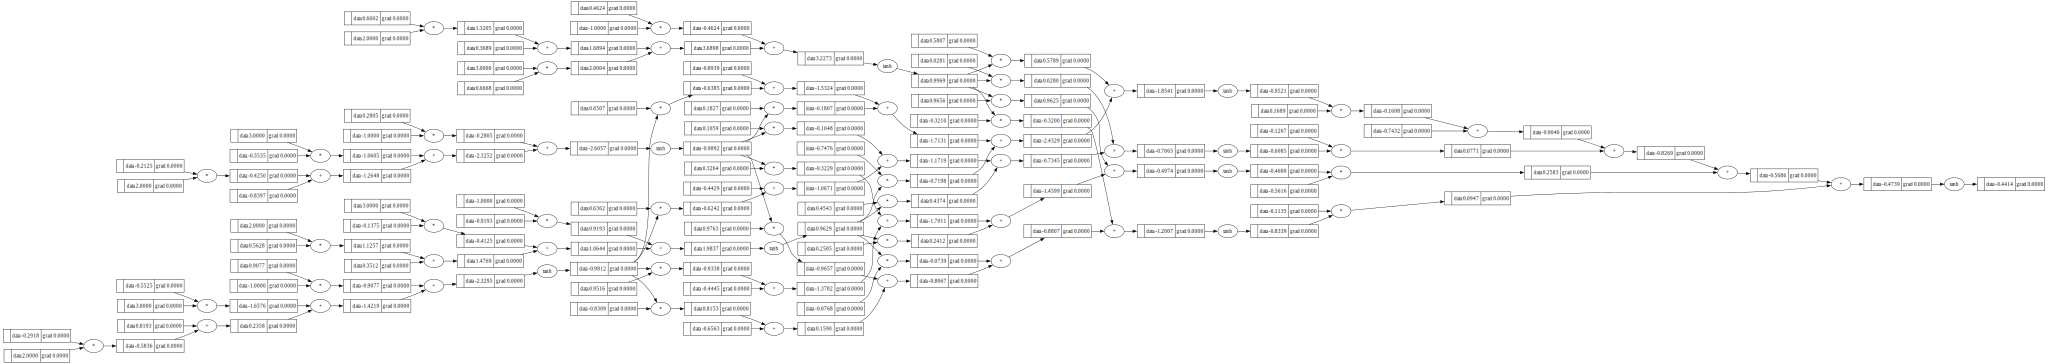

In [9]:
draw_dot(n(x))

In [29]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0]

[Value(data=-0.6801006025946099),
 Value(data=-0.6118302253017601),
 Value(data=-0.7234660782303362),
 Value(data=-0.7220600196952861)]

In [40]:
ypred = [n(x) for x in xs]
lol = [(yout - ygt)**2 for ygt, yout in zip(ys, ypred)]
lol
# loss = sum(lol)
# loss

[Value(data=3.99997248827158),
 Value(data=0.2348898590089176),
 Value(data=3.0974710697031455e-11),
 Value(data=3.999749468600649)]

In [49]:
ypred

[Value(data=0.8926632443521034),
 Value(data=-0.9023121409572802),
 Value(data=-0.9944382532945379),
 Value(data=0.8933656573869727)]

In [41]:
loss = lol[0] + lol[1]

In [42]:
loss += lol[2]
loss += lol[3]

In [48]:
for k in range(20):
    
    # forward pass
    ypred = [n(x) for x in xs]
    lol = [(yout - ygt)**2 for ygt, yout in zip(ys, ypred)]
    loss = lol[0] + lol[1]
    loss += lol[2]
    loss += lol[3]
#     lol

    # backward pass
    for p in n.parameters():
        p.grad = 0.0
    loss.backward()
    
    # update
    for p in n.parameters():
        p.data += -0.05 * p.grad
        
    print(k, loss.data)

0 7.108274366691667
1 4.7720702575620555
2 2.441778699615843
3 1.2584220270980127
4 0.6207573764056654
5 0.36496127229005404
6 0.23485584950346589
7 0.17007756296712764
8 0.1314462476088463
9 0.10589623676217264
10 0.0879941820665454
11 0.07487667100681622
12 0.06491795073952528
13 0.057137520378312476
14 0.050913970577891585
15 0.04583687859057063
16 0.04162557655278214
17 0.0380823514365125
18 0.035064322083924106
19 0.03246591296829476


In [45]:
loss

Value(data=8.234611815912121)

In [35]:
loss.backward()

In [36]:
n.layers[0].neurons[0].w[0].grad

-0.3390970201799397

In [37]:
n.layers[0].neurons[0].w[0].data

-0.9149749544733325

In [38]:
for p in n.parameters():
    p.data += -0.01 + p.grad

In [39]:
n.layers[0].neurons[0].w[0].data

-1.2640719746532723